## Importing Libraries & Data

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [36]:
df = pd.read_csv('/home/g202103050/Documents/Thesis_EDA/Data/10%IF.csv')

In [37]:
df.describe()

,Unnamed: 0,DT,GR,ILD,RHOB,NPHI
count,1.787480e+06,1.787480e+06,1.787480e+06,1.787480e+06,1.787480e+06,1.787480e+06
mean,8.937395e+05,8.576104e+01,6.760148e+01,4.779406e+00,2.453303e+00,2.292769e-01
std,5.160012e+05,2.551624e+01,3.372358e+01,8.291448e+00,2.216039e-01,1.294902e-01
min,0.000000e+00,1.000000e+01,-5.407891e+00,-7.276608e+00,1.500024e+00,0.000000e+00
25%,4.468698e+05,6.886510e+01,4.157299e+01,9.888321e-01,2.339057e+00,1.343987e-01
50%,8.937395e+05,7.752851e+01,6.648526e+01,2.442055e+00,2.494000e+00,2.079563e-01
75%,1.340609e+06,9.437421e+01,9.090850e+01,5.913363e+00,2.613651e+00,3.163054e-01
max,1.787479e+06,1.999109e+02,2.998486e+02,1.000000e+02,3.000000e+00,7.905863e-01


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787480 entries, 0 to 1787479
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   DT          float64
 2   GR          float64
 3   ILD         float64
 4   RHOB        float64
 5   NPHI        float64
dtypes: float64(5), int64(1)
memory usage: 81.8 MB


## Building an Isolation Forest Model (2 Features)

In [39]:
anomaly_inputs = ['NPHI', 'RHOB']

In [41]:
model_IF = IsolationForest(contamination=0.1, random_state=42)

In [42]:
model_IF.fit(df[anomaly_inputs])

/home/g202103050/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [43]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

In [44]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [45]:
df.loc[:, ['NPHI', 'RHOB','anomaly_scores','anomaly'] ]

,NPHI,RHOB,anomaly_scores,anomaly
0,0.351225,2.311944,0.101919,1
1,0.338991,2.227482,0.080967,1
2,0.323001,2.147015,0.037527,1
3,0.307644,2.095283,0.020981,1
4,0.297341,2.084053,0.018485,1
...,...,...,...,...
1787475,0.113714,2.621910,0.146699,1
1787476,0.122467,2.608799,0.147791,1
1787477,0.124928,2.590472,0.147896,1
1787478,0.120904,2.576124,0.148671,1


In [46]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 178744
Number of non anomalous values  1608736
Total Number of Values: 1787480


/home/g202103050/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/g202103050/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


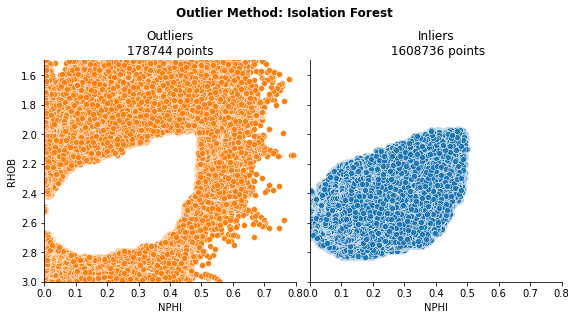

In [47]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

## Building an Isolation Forest Model Using Multiple Features

In [48]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'DT']

In [49]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'DT']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


/home/g202103050/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 178748
Number of non anomalous values  1608732
Total Number of Values: 1787480


/home/g202103050/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/g202103050/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


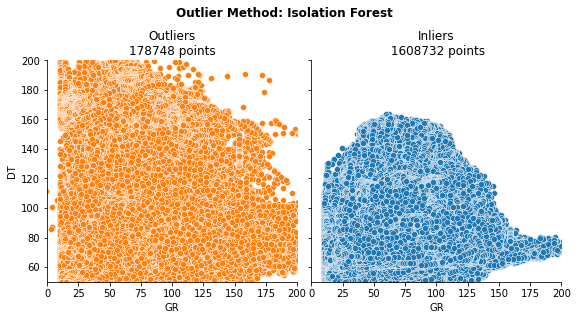

In [63]:
outlier_plot(df, 'Isolation Forest', 'GR', 'DT', [0, 200], [50, 200]);

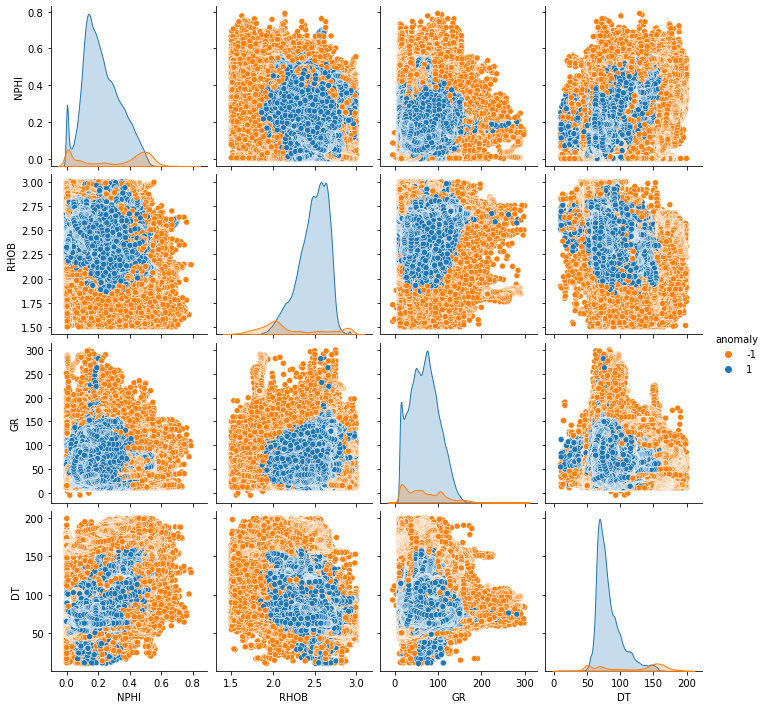

In [34]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [35]:
# Filter out anomalies
df_cleaned = df[df['anomaly'] != -1]

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('', index=False)

FileNotFoundError: [Errno 2] No such file or directory: ''